PHYS 381: Computational Physics

Assignment 3: Projectile motion under air resistance

Jared Crebo 30085839

Kernel: Python 3.10.11 | IDE: Visual Studio Code

1 How does the air resistance scale with the velocity?


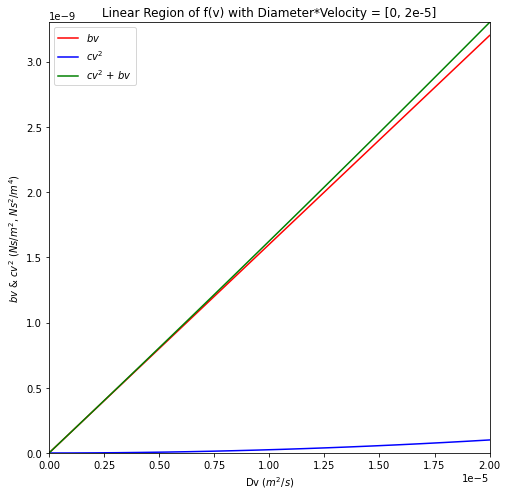

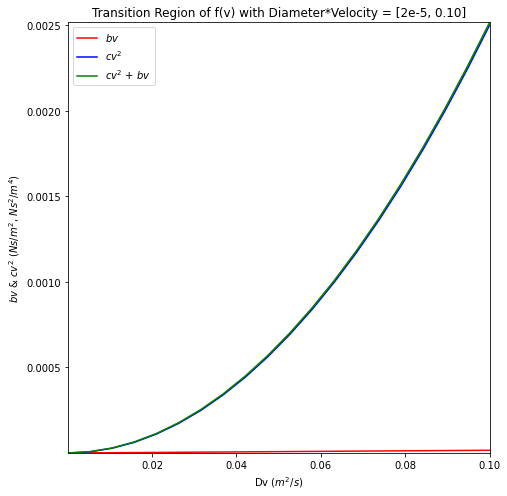

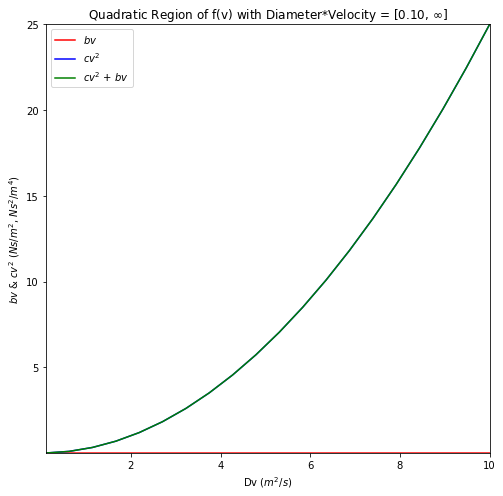

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sphere Parameters
B_sphere = 1.6e-4 # Ns/m^2
C_sphere = 0.25 # Ns^2 / m^4
D_sphere = 1 # diameter (m)

# Determine ranges of velocities to test each air resistance scale in m/s
linear_velocity = np.linspace(0,0.00002,20) # 0 - 2e-5
transition_velocity = np.linspace(0.00002, 0.1, 20) # 2e-5 - 0.1
quadratic_velocity = np.linspace(0.1, 10, 20) # 0.1 - 10

def air_resistance_func(B, C, D, v):
    '''
    Input Parameters
    B - linear air resistance coefficient (Ns/m^2)
    C - quadratic air resistance coefficient (Ns^2/m^4)
    D - diameter of projectile
    v - range of velocities (array)

    Function returns b = BD, c = CD^2, and f(v) for calculating the force of air resistance
    F = -f(v)
    '''
    b = B * D
    c = C * D**2
    f = b * v + c * v**2
    return b, c, f

def air_resistance_plot(B, C, D, v, title):
    '''
    Input Parameters
    B - linear air resistance coefficient (Ns/m^2)
    C - quadratic air resistance coefficient (Ns^2/m^4)
    D - diameter of projectile
    v - range of velocities (array)
    title - title of figure (String)

    Function uses air_resistance_func() and plots the calculated air resistance force
    '''
    # Calculate force of air resistance f
    b, c, f = air_resistance_func(B, C, D, v)

    fig, ax = plt.subplots(figsize=[7,7])
    ax.plot(D*v, b*v,color="red",label="$bv$") # Plot linear air resistance f(v) = bv
    ax.plot(D*v, c*v**2, color = "blue", label = "$cv^2$") # Plot quadratic air resistance f(v) = cv^2
    ax.plot(D*v, f, color="green", label = "$cv^2$ + $bv$") # Plot full air resistance formula f(v) = bv + cv^2
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("Dv ($m^2/s$)")
    ax.set_ylabel("$bv$ & $cv^2$ ($Ns/m^2$, $Ns^2/m^4$)")
    fig.tight_layout()
    ax.set_ylim([min(f),max(f)])
    ax.set_xlim([min(D*v),max(D*v)])

# Plot air resistance for linear velocity region, transition velocity region, and quadratic velocity region
air_resistance_plot(B_sphere, C_sphere, D_sphere, linear_velocity, "Linear Region of f(v) with Diameter*Velocity = [0, 2e-5]")
air_resistance_plot(B_sphere, C_sphere, D_sphere, transition_velocity, "Transition Region of f(v) with Diameter*Velocity = [2e-5, 0.10]")
air_resistance_plot(B_sphere, C_sphere, D_sphere, quadratic_velocity, "Quadratic Region of f(v) with Diameter*Velocity = [0.10, $\infty$]")



In general, the linear region is approximately Dv ~ [0, 2e-5], transition region is Dv ~ [2e-5, 0.1], and the quadratic region is Dv ~ [0.1, $\infty$] as shown in the figures above. 

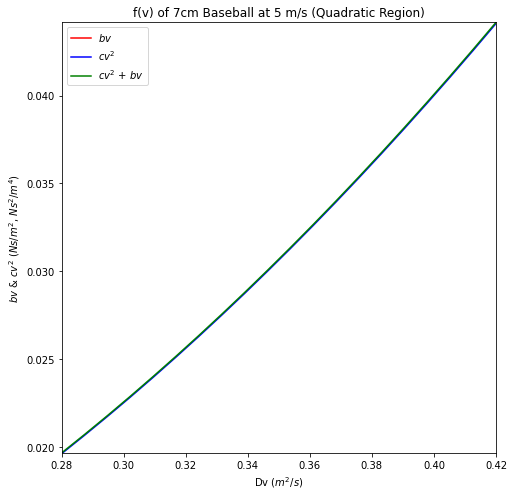

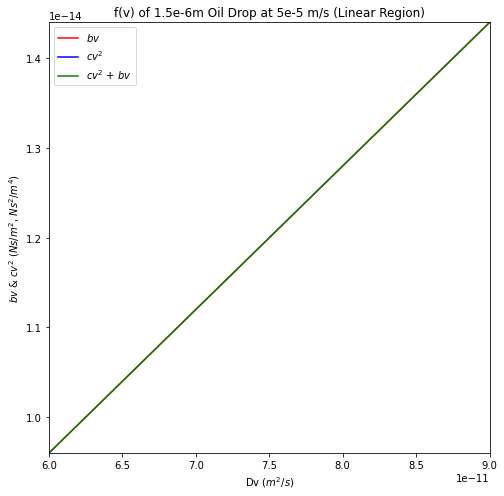

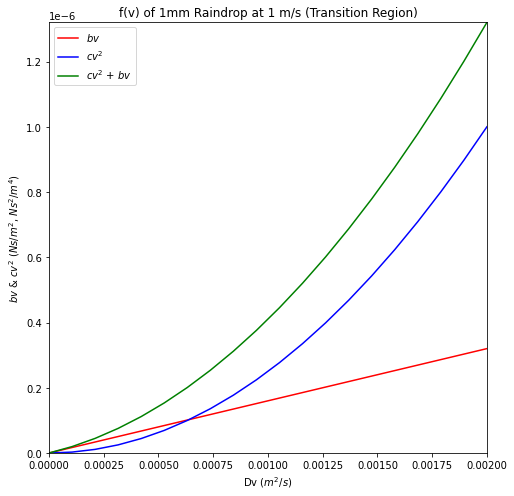

In [7]:
air_resistance_plot(B_sphere, C_sphere, 0.07, np.linspace(4,6,20), "f(v) of 7cm Baseball at 5 m/s (Quadratic Region)") # Velocity = 5 m/s
air_resistance_plot(B_sphere, C_sphere, 1.5e-6, np.linspace(4e-5,6e-5,20), "f(v) of 1.5e-6m Oil Drop at 5e-5 m/s (Linear Region)") # Velocity = 5e-6 m/s
air_resistance_plot(B_sphere, C_sphere, 0.001, np.linspace(0,2,20), "f(v) of 1mm Raindrop at 1 m/s (Transition Region)") # Velocity = 1 m/s

The baseball is in the quadratic region since Dv = 0.35 $m^2/s$. The oil drop is in the linear region because Dv = 7.5e-12 $m^2/s$. And the raindrop is in the transition region because Dv = 0.001 $m^2/s$. 